<a href="https://colab.research.google.com/github/JulianOmar/HPC/blob/main/Cuaderno_1_Miercoles_grupo8_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cuaderno 2 - Miércoles - Grupo 8: Ajustar el espectro de color

# **Introducción**

En el presente cuaderno se mostrara la implementación del filtro de imagen **Brightening** realizado en Python[1][2]. En consecuencia se realizara una comparativa de su ejecución por medio de CPU y GPU para el cual se utilizara la biblioteca PyCUDA [3]. Para aplicar un valor de brillo a una imagen, debemos implementar la siguinete operación[4]: 
<p align=center> $ M + B = C $ </p>

<p align=center>$ 
 \begin{pmatrix}
  m_{1,1} & m_{1,2} & \cdots & m_{1,n} \\
  m_{2,1} & m_{2,2} & \cdots & m_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  m_{m,1} & m_{m,2} & \cdots & m_{m,n}
 \end{pmatrix} + 
 \begin{pmatrix}
  (p,p,p) & (p,p,p) & \cdots & (p,p,p) \\
  (p,p,p) & (p,p,p) & \cdots & (p,p,p) \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  (p,p,p) & (p,p,p) & \cdots & (p,p,p)
 \end{pmatrix}
 = C$
 </p>


  
Donde $m_{i,j}$corresponde a un vector $(r_{i,j}, g_{i,j}, b_{i,j}) $ correspondiente a la imagen.  
Para i = 1, 2, 3, ... , m y j = 1, 2, 3, ... , n  
**C** corresponderá a la imagen ajustada de **M** y **B** es la matriz de ajuste del brillo.
Y ***p*** es el parámetro de ajuste de brillo, cuyo estándar va de -100 a 100 donde el -100 es el minimo brillo y el 100 la maxima cantidad de brillo que podemos alcanzar.



# **Armado del ambiente**
Debido a que vamos a ejecutar código tanto en CPU como en GPU, necesitamos tener unas consideraciones previas.

1. Primero que nada hay que habilitar el entorno GPU.

  Para esto hay que ir a **Entorno de ejecución > Cambiar tipo de entorno de ejecución**. <br>Seleccionar GPU como *acelerador de hardware* y luego guardar.
2. Luego debemos instalar **pycuda** ya que vamos a trabajar con ésta biblioteca.
  <br>Para ello debemos ejecutar la siguiente instrucción:


In [ ]:
!pip install pycuda

3. Debemos ingresar una imagen a la cual aplicarle el filtro.

In [ ]:
#@markdown ### Especifique la URL de la imagen:
url_imagen = "https://github.com/JulianOmar/HPC/blob/main/Recursos/paisajes-expresivos-734x489.jpg?raw=true" #@param {type:"string"}

!wget {url_imagen} -O imagen.jpg


4. Seleccionamos la intensidad de brillo que se desea aplicar a la imagen

In [ ]:
#@title  Seleccionar valor de <strong>Brillo</strong> a aplicar:
#@markdown ---
brillo = 72 #@param {type:"slider", min:-100, max:100, step:1}

# Desarrollo 

## Implementación con CPU

In [ ]:
from datetime import datetime
import  matplotlib.pyplot as plt
import numpy
from PIL import Image 

Imagen del filtro: imagen.jpg -RGB- [734, 489]
La intensidad de brillo es: 72


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Tiempo de conversión de imagen: 3776.793 [ms]
Tiempo Total: 3834.672 [ms]


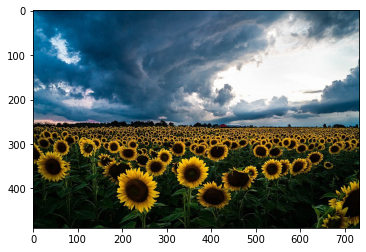

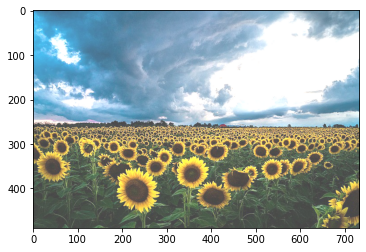

In [ ]:
 %matplotlib inline

tiempo_total = datetime.now()
# --------------------------------------------
# Definición de función que transforma el tiempo en  milisegundos 
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
# --------------------------------------------


img_nombre = 'imagen.jpg'
image = Image.open( img_nombre ) 
  
# Obtengo las proporciones de la imagen. 
img_ancho, img_alto = image.size 

# Convierto la imagen comprimida en JPEG/PNG a array.
img_pic_cpu = numpy.asarray(image)
img_pic_cpu = img_pic_cpu.astype( numpy.int32() )

# Genero el array resultado (3 pixeles usa RGB * (el tamaño del array)).
img_picR_cpu = numpy.empty_like( img_pic_cpu)

# Muestro los atributos de la imagen y como se ve.
print("Imagen del filtro: " + img_nombre + " -" + image.mode + "- [" + str(img_ancho) + ", " + str(img_alto ) + "]" )  

# Muestro la imagen antes de aplicarle el filtro.
plt.figure()
imgplot=plt.imshow( img_pic_cpu )

tiempo_img = datetime.now()

# BRILLO
print("La intensidad de brillo es:", brillo);

# Convierto la imagen según el valor de brillo ingresado por parámetro
for y  in range( 0, img_alto ):
  for x in range( 0, img_ancho ):
    pixelrojo, pixelverde, pixelazul = img_pic_cpu[y][x]

    nvopixelrojo = (pixelrojo + brillo)
    nvopixelverde = (pixelverde + brillo)
    nvopixelazul = (pixelazul + brillo)
    img_picR_cpu[y][x] = [nvopixelrojo, nvopixelverde, nvopixelazul]


tiempo_img = datetime.now() - tiempo_img

# Muestro la imagen luego de aplicarle el filtro.
plt.figure()
imgplot = plt.imshow( img_picR_cpu )

tiempo_total = datetime.now() - tiempo_total

print( "Tiempo de conversión de imagen:", tiempo_en_ms( tiempo_img   ), "[ms]" )
print( "Tiempo Total:",                   tiempo_en_ms( tiempo_total ), "[ms]" )


---
## Implementación con GPU

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy
from PIL import Image 
import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


La intensidad de brillo es: 72
Imagen del filtro: imagen.jpg -RGB- [734, 489]
Thread: [ 16 , 19  ], Bloque : [ 46 , 26 ]
Total de Thread: [ 736 , 494  ]  =  363584
Tiempo GPU  :  0.166 [ms]
Tiempo TOTAL:  67.677 [ms]


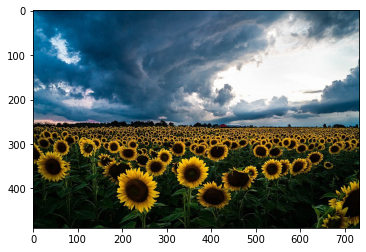

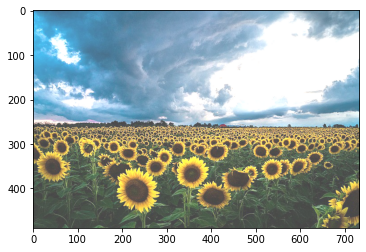

In [ ]:
%matplotlib inline

tiempo_total = datetime.now()

# --------------------------------------------
# Definición de función que transforma el tiempo en  milisegundos 
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
# --------------------------------------------

img_nombre = 'imagen.jpg'
image = Image.open( img_nombre ) 
  
# summarize some details about the image 
img_ancho, img_alto  = image.size 

# Convierto la imagen comprimida en JPEG/PNG a array
img_O_cpu = numpy.asarray(image)
img_O_cpu = img_O_cpu.astype( numpy.int32() )
img_R_cpu = numpy.empty_like( img_O_cpu)

# Reservo los 2 vectores en GPU(3 pixeles usa RGB * (el tamaño del array))
img_O_gpu = cuda.mem_alloc( img_O_cpu.nbytes )
img_R_gpu = cuda.mem_alloc( img_R_cpu.nbytes )

# GPU - Copio la memoria al GPU.
cuda.memcpy_htod( img_O_gpu, img_O_cpu )
cuda.memcpy_htod( img_R_gpu, img_R_cpu )

# BRILLO
print("La intensidad de brillo es:", brillo);

# CPU - Defino la función kernel que ejecutará en GPU.
module = SourceModule(""" 
__global__ void kernel_img( float valorB, int ancho, int alto, int *img_O, int *img_R )
{
  // Calculo las coordenadas del Thread en dos dimensiones.
  int idx = threadIdx.x + blockIdx.x*blockDim.x;
  int idy = threadIdx.y + blockIdx.y*blockDim.y;
  
  float nvopixelrojo;
  float nvopixelverde;
  float nvopixelazul;
 
  // Verifico que los Thread, esten dentro de las dimensiones de la imagen.
  if( idx < ancho && idy < alto )
  {
    // Calculo el nuevo color para el pixel a partir de los componentes.
    nvopixelrojo =  (float) ((img_O[ ((idx+(idy*ancho))*3)+0 ] + valorB)); //Rojo
    nvopixelverde = (float) ((img_O[ ((idx+(idy*ancho))*3)+1 ] + valorB)); //Verde
    nvopixelazul =  (float) ((img_O[ ((idx+(idy*ancho))*3)+2 ] + valorB)); //Azul

    // Escribo el nuevo color del pixel.
    img_R[(idx+(idy*ancho))*3+0] = (int) nvopixelrojo;
    img_R[(idx+(idy*ancho))*3+1] = (int) nvopixelverde;
    img_R[(idx+(idy*ancho))*3+2] = (int) nvopixelazul;
  }
}
""") 

# Muestro los atributos de la imagen y como se ve antes del seudo filtro.
print("Imagen del filtro: " + img_nombre + " -" + image.mode + "- [" + str(img_ancho) + ", " + str(img_alto ) + "]" )  

# CPU - Genero la función kernel.
kernel = module.get_function("kernel_img")

tiempo_img = datetime.now()

dim_hilo_x = 16
dim_bloque_x = numpy.int( (img_ancho+dim_hilo_x-1) / dim_hilo_x )

dim_hilo_y = 19
dim_bloque_y = numpy.int( (img_alto+dim_hilo_y-1) / dim_hilo_y )

print( "Thread: [", dim_hilo_x, ",", dim_hilo_y, " ], Bloque : [", dim_bloque_x, ",", dim_bloque_y, "]" )
print( "Total de Thread: [", dim_hilo_x*dim_bloque_x, ",", dim_hilo_y*dim_bloque_y, " ]", " = ", dim_hilo_x*dim_bloque_x*dim_hilo_y*dim_bloque_y )

tiempo_img = datetime.now()

kernel( numpy.float32(brillo), numpy.int32(img_ancho), numpy.int32(img_alto), img_O_gpu, img_R_gpu, block=( dim_hilo_x, dim_hilo_y, 1 ), grid=(dim_bloque_x, dim_bloque_y,1) )

tiempo_img = datetime.now() - tiempo_img

# GPU - Copio el resultado desde la memoria GPU.
cuda.memcpy_dtoh( img_R_cpu, img_R_gpu )

# Muestro la imagen Original el filtro.
plt.figure()
imgplot=plt.imshow( img_O_cpu )

# Muestro la imagen luego de aplicarle el filtro.
plt.figure()
imgplot=plt.imshow( img_R_cpu )

tiempo_total = datetime.now() - tiempo_total

print("Tiempo GPU  : ", tiempo_en_ms( tiempo_img ), "[ms]" )
print("Tiempo TOTAL: ", tiempo_en_ms( tiempo_total ), "[ms]" )

---
# Métricas


Resultados obtenidos con la imagen (URL: *https://github.com/JulianOmar/HPC/blob/main/Recursos/paisajes-expresivos-734x489.jpg*) y el valor de Brillo <strong>72</strong>

**Ejecución CPU:**
   
*   *Tiempo de conversión de imagen*: 3776.793  [ms] 
*   *Tiempo Total*: 3834.672  [ms] 

**Ejecución GPU:**

*   *Tiempo GPU*  : 0.171     [ms] 
*   *Tiempo TOTAL*: 67.335    [ms] 



# Conclusiones

  Como conclusiones, viendo las métricas conseguidas, vemos que el rendimiento al llevar a cabo el algoritmo del filtro con un ámbito GPU es alrededor de 57% más rápida y aprovechando la función de los threads optimización de manera considerable comparativamente a la utilización CPU.

 Se debe considerar que, para imágenes pequeñas, es viable que el algoritmo de CPU demore menos tiempo de ejecución. Esto se debería a que la utilización de GPU necesita un periodo fundamentalmente fijo para la planificación de los threads (overhead) que en imágenes grandes pasa inadvertido.

 A medida que más enorme sea la imágen, más grande va a ser la brecha de tiempos entre las dos implementaciones. Esto se debería a la grán dificultad computacional que muestra la utilización de CPU. 

# Bibliografía

*   [1] Repositorio cátedra SOA: https://github.com/wvaliente/SOA_HPC
*   [2] Introducción a Python:[LINK](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/Python_Basico.ipynb)
*   [3] PyCUDA Documentation: [doc](https://documen.tician.de/pycuda/)
*   [4] 2009, SINTESIS DIGITAL DE COLOR UTILIZANDO TONOS DE GRIS, ING. JESÚS GUSTAVO FLORES ERAÑA : [PDF](https://ninive.uaslp.mx/xmlui/bitstream/handle/i/2264/MCA1SDC00901.pdf?sequence=1&isAllowed=y)

